In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("owid-co2-data_cleaned.csv")

# Identify and clean relevant columns before conversion
numeric_cols = ['co2', 'co2_per_capita', 'gdp', 'population', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'land_use_change_co2', 'total_ghg']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(0)

# Filter data for recent years (2000 onwards)
recent_data = data[data['year'] >= 2000].copy()


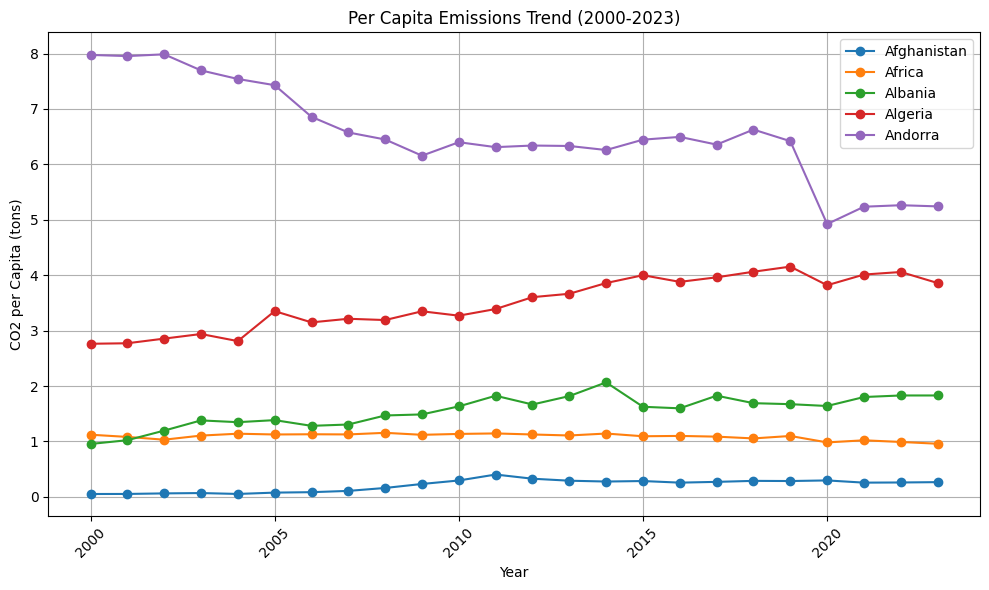

In [2]:
# 1. Line Chart: Per Capita Emissions Trend for top 5 countries
plt.figure(figsize=(10, 6))
for country in recent_data['country'].value_counts().head(5).index:
    country_data = recent_data[recent_data['country'] == country]
    plt.plot(country_data['year'], country_data['co2_per_capita'], label=country, marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 per Capita (tons)')
plt.title('Per Capita Emissions Trend (2000-2023)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

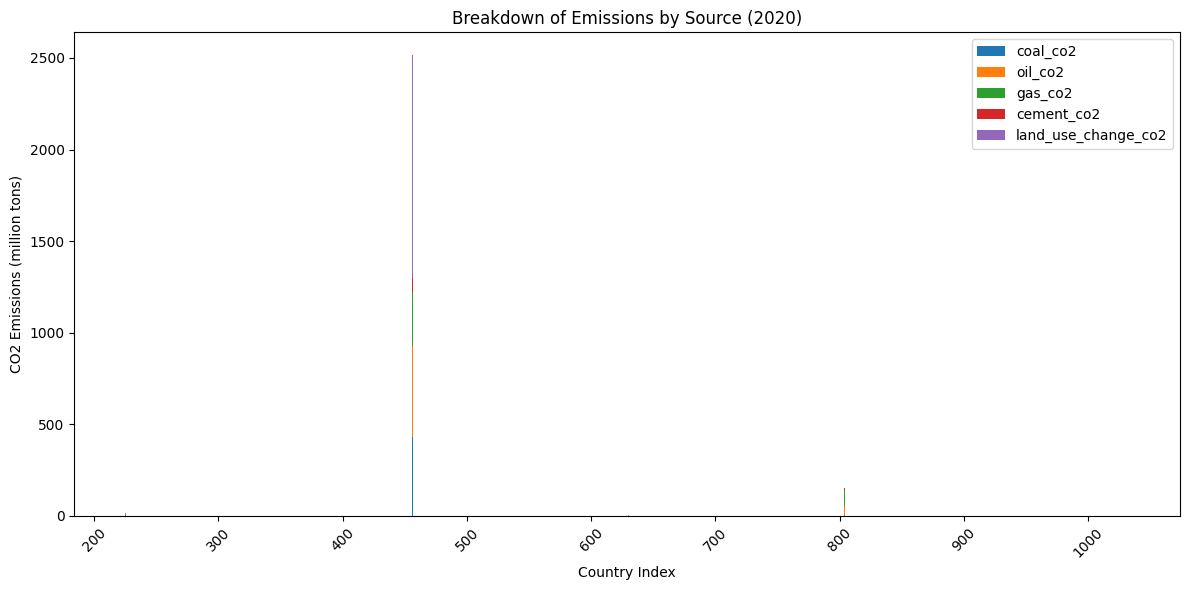

In [3]:
# 2. Stacked Bar: Breakdown of Emissions by Source for 2020
year_2020 = recent_data[recent_data['year'] == 2020].copy()
top_countries = year_2020['country'].value_counts().head(5).index
emissions_2020 = year_2020[year_2020['country'].isin(top_countries)][['country', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'land_use_change_co2']]

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(emissions_2020))
for column in ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'land_use_change_co2']:
    plt.bar(emissions_2020.index, emissions_2020[column], bottom=bottom, label=column)
    bottom += emissions_2020[column]
plt.xlabel('Country Index')
plt.ylabel('CO2 Emissions (million tons)')
plt.title('Breakdown of Emissions by Source (2020)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

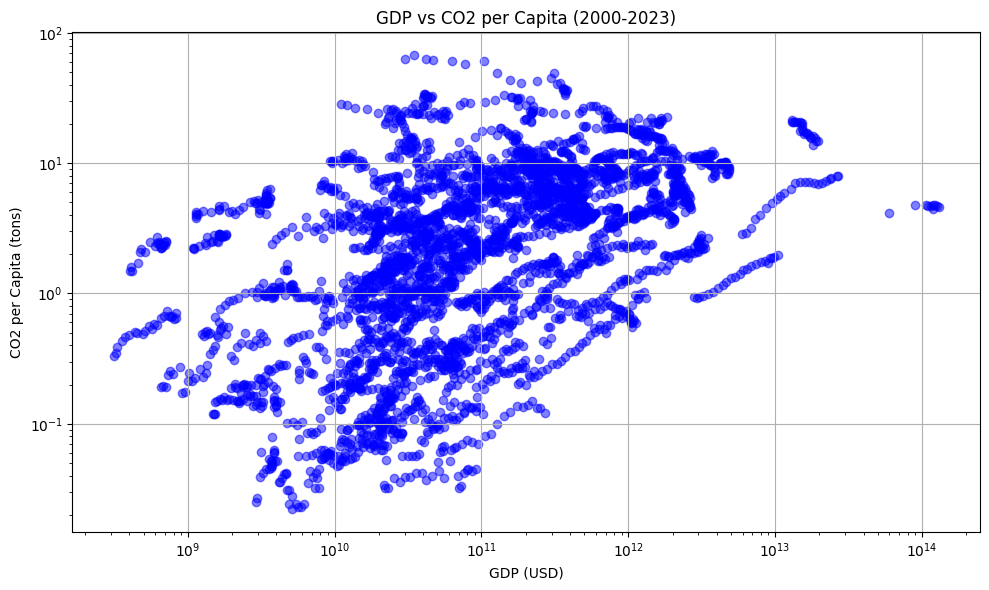

In [4]:
# 3. Scatter Plot: GDP vs CO2 per Capita
plt.figure(figsize=(10, 6))
plt.scatter(recent_data['gdp'], recent_data['co2_per_capita'], alpha=0.5, c='blue')
plt.xlabel('GDP (USD)')
plt.ylabel('CO2 per Capita (tons)')
plt.title('GDP vs CO2 per Capita (2000-2023)')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

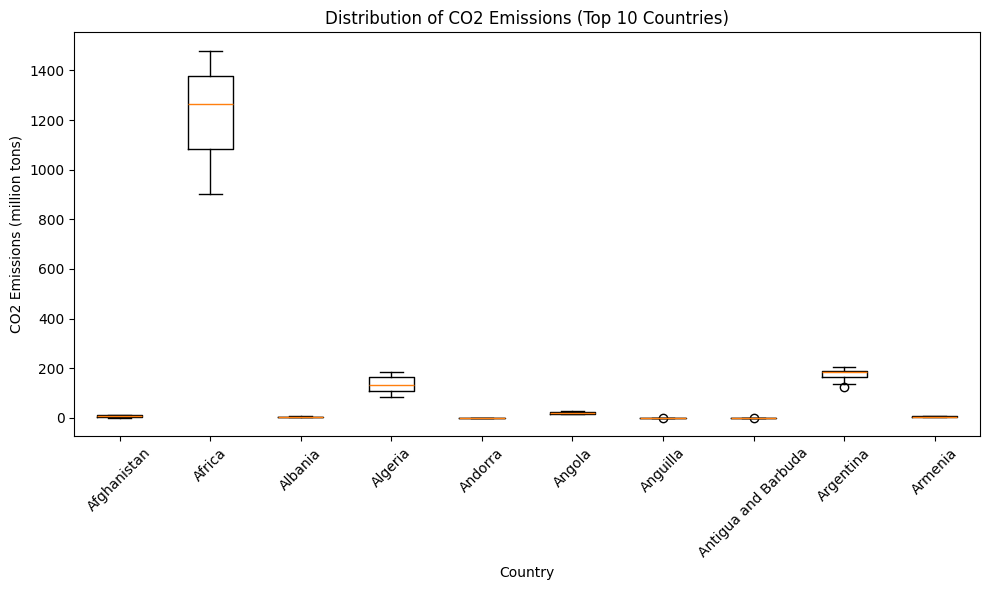

In [5]:
# 4. Box Plot: Distribution of CO2 Emissions Across Countries
plt.figure(figsize=(10, 6))
country_data = [recent_data[recent_data['country'] == country]['co2'].dropna() for country in recent_data['country'].unique()[:10]]
plt.boxplot(country_data)
plt.xticks(range(1, len(recent_data['country'].unique()[:10]) + 1), recent_data['country'].unique()[:10], rotation=45)
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (million tons)')
plt.title('Distribution of CO2 Emissions (Top 10 Countries)')
plt.tight_layout()
plt.show()

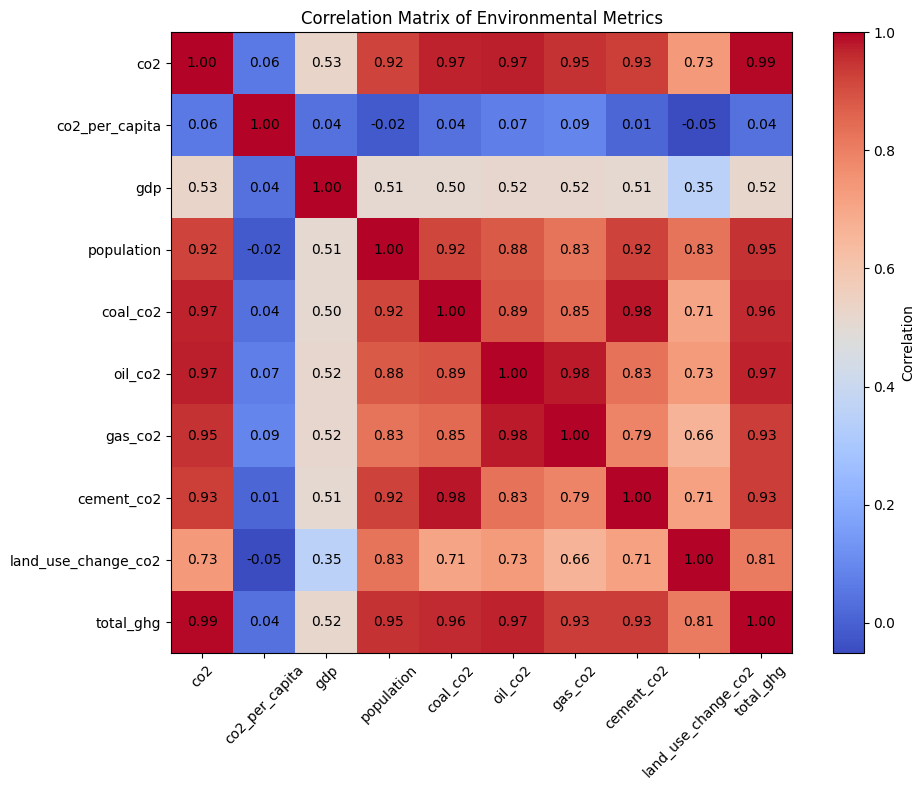

In [6]:
# 5. Heatmap: Correlation Matrix of Key Metrics
correlation_matrix = recent_data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix of Environmental Metrics')
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

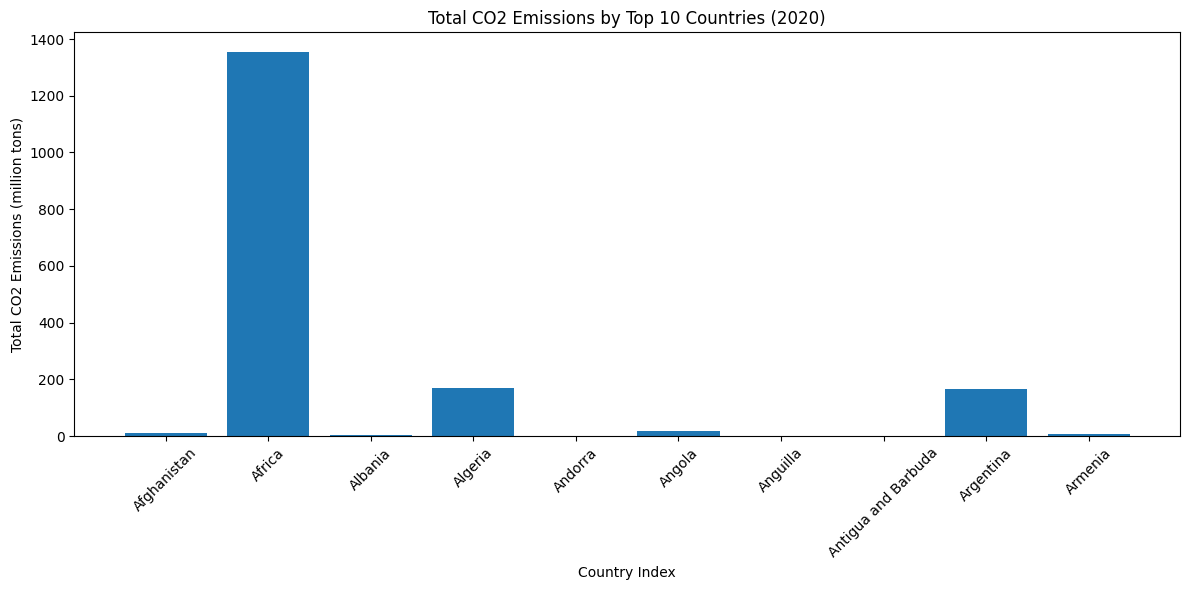

In [7]:
# 6. Bar Chart: Total CO2 by Top 10 Countries (Aggregated for 2020)
country_2020 = recent_data[recent_data['year'] == 2020].groupby('country')['co2'].sum().dropna().head(10)
plt.figure(figsize=(12, 6))
plt.bar(range(len(country_2020)), country_2020.values)
plt.xlabel('Country Index')
plt.ylabel('Total CO2 Emissions (million tons)')
plt.title('Total CO2 Emissions by Top 10 Countries (2020)')
plt.xticks(range(len(country_2020)), country_2020.index, rotation=45)
plt.tight_layout()
plt.show()


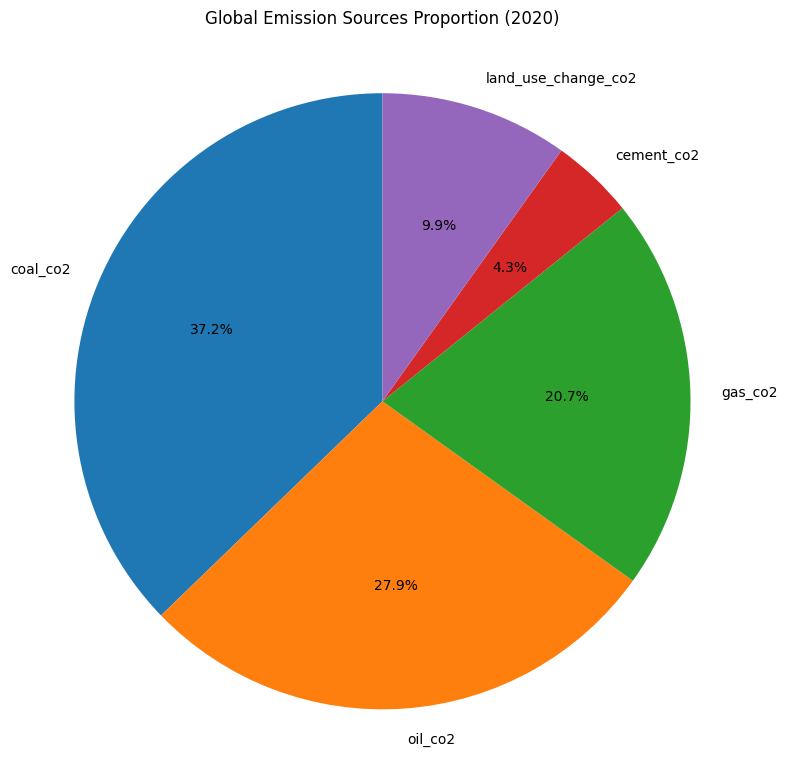

In [8]:
# 7. Pie Chart: Proportion of Emission Sources (Global Average 2020)
global_2020 = recent_data[recent_data['year'] == 2020][['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'land_use_change_co2']].sum().dropna()
plt.figure(figsize=(8, 8))
plt.pie(global_2020, labels=global_2020.index, autopct='%1.1f%%', startangle=90)
plt.title('Global Emission Sources Proportion (2020)')
plt.axis('equal')
plt.tight_layout()
plt.show()